# Fig13B - 
Enriched tetramers in subtelomeric sequences. The distribution of tetramers in genomic regions (> 300 bp) overlapping tandem repeat and other non-tandem repeats (grey) in the distal subtelomeric portions of metacentric chromosomes. The two most enriched monomers (AGGG/CCCT and TGGG/CCCA) are similar to the 7-nucleotide oligomer 'CCTCCCT' and 'CCCACCCC' that have been associated with recombination hotspots in other vertebrates.

In [28]:
source_data_path = '/global/cfs/cdirs/plantbox/bredeson/Xenopus/tropicalis/SourceData/'
sup_fig = 'Supplementary_Fig.13/'

paths_files_fig = ''.join((source_data_path,sup_fig))


In [4]:
import pysam
import pandas as pd
import pysam
import numpy as np
import matplotlib.pyplot as plt

alt_map = {'ins':'0'}
complement = {'A': 'T', 'C': 'G', 'G': 'C', 'T': 'A','N':'N'} 


def reverse_complement(seq):
    seq = seq.upper()
    #for k,v in alt_map.iteritems():
    #    seq = seq.replace(k,v)
    bases = list(seq) 
    bases = reversed([complement.get(base,base) for base in bases])
    bases = ''.join(bases)
    #for k,v in alt_map.iteritems():
    #    bases = bases.replace(v,k)
    return bases



genome_file = '/global/cscratch1/sd/sofiamr/SAPS/X_tropicalis_V10_Final/IGC_7/TRF_Out/XENTRv10-1_Chrs_only.fa'
fasta = pysam.FastaFile(genome_file)

S= ['A','T','C','G']
kmer_4 = []
for a in S:
    for b in S:
        for c in S:
            for d in S:
                kmer_4.append(a+b+c+d)
                
                
counter = 0
                
#list_motifs = ['AGGG','TGGG','CGGG','GGGG', 'ACCC', 'TCCC','CCCC','GCCC']
#list_motifs = ['AGGGA','TGGGT','CGGGC','GGGGG', 'ATTTA','CTTTC','GCCCG', 'ATCAT','GTGGG','GAGGG','GCGGG','TATTT','TCTTT','TGTTT','GGAGG', 'GGGG','CGGG','AGGG','TGGG','ATTT','TTTT','CTTT','GTTT']# 'ACCCA', 'TCCCT','GCCCG']
list_motifs = kmer_4
Mb = float(1000000)

acrocentric_chrs = ['Chr3','Chr8','Chr10']
def  obtain_density_per_repeat(list_motifs, repeat_coordinates, genome_file):    
    counter=0
    density_motifs = dict()
    
    for motif in list_motifs:
        motif_R = reverse_complement(motif)
        density_motifs[motif]=[] 
        if (motif_R in list_motifs) == False:
            density_motifs[motif_R]=[] 
    
    
    with open(repeat_coordinates) as f:
        for line in f:
            counter=counter+1
    
            Chr, Start, End = line.strip('\n').split("\t")
            [Start,End] = map(int, [Start,End])
            if (Start< 30*Mb) & ((Chr in acrocentric_chrs) == False) & (Chr.startswith('Chr')):
                region_seq = fasta.fetch(Chr, Start, End).upper()
                
                for motif in density_motifs.keys():
                    motif_R= reverse_complement(motif)
                    n_motif_F = region_seq.count(motif)
                    n_motif_R = region_seq.count(motif_R)
                    if len(region_seq) > 300:
                        density_motifs[motif].append(100*(n_motif_F+ n_motif_R)/float(len(region_seq)))
                        #if (100*(n_motif_F+ n_motif_R)/len(region_seq)) >  0.2:
                            #print (motif, counter,Chr, Start, End)
                
    return(density_motifs)

In [5]:
repeat_coordinates = '/global/cscratch1/sd/sofiamr/SAPS/X_tropicalis_V10_Final/IGC_7/TRF_Out/XENTRv10-1_CONSENSUS_DF_nr.bed' #'/Users/sofiamr/Documents/Rocksar Lab/X_tropicalis_V10Final/Shared_Owens/XENTRv10-1_CONSENSUS_DF_nr.bed'
tandem_densities = obtain_density_per_repeat(list_motifs, repeat_coordinates, genome_file)

repeat_coordinates = '/global/cscratch1/sd/sofiamr/SAPS/X_tropicalis_V10_Final/IGC_7/TRF_Out/RepMask_non_overlapping_TRF.bed'
RM_repeats_densities = obtain_density_per_repeat(list_motifs, repeat_coordinates, genome_file)

Saved as /global/cscratch1/sd/sofiamr/SAPS/X_tropicalis_V10_Final/DATA_OUT/Xtropicalis_Final_FigS13B.pdf


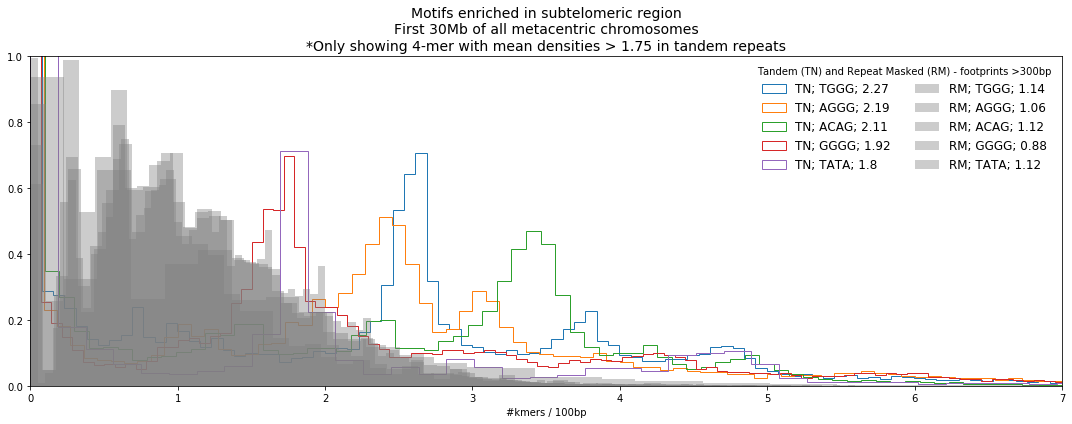

In [41]:
### Supplementary Figure 13B

plt.figure(figsize=(15,6))
for x in sort_orders:
    motif= x[0]
    means = str(np.round(x[1],2))
    plt.hist(tandem_densities[motif], bins=200, alpha=1, density=True, histtype='step', label='; '.join(('TN',motif, means)))

for x in sorted(MOTIFS_ENRICHED.items(), key=lambda x: x[1], reverse=True):
    motif= x[0]
    means = str(np.round(np.mean(RM_repeats_densities[motif]),2))
    plt.hist(RM_repeats_densities[motif], bins=200, label='; '.join(('RM',motif, means)), alpha=.4, density=True, color='grey')#, histtype='step', color='black')

plt.legend(bbox_to_anchor=(1,1), frameon=False, ncol=2, fontsize=12, title='Tandem (TN) and Repeat Masked (RM) - footprints >300bp')
plt.ylim(0, 1)
plt.xlim(0, 7)
plt.title('Motifs enriched in subtelomeric region\nFirst 30Mb of all metacentric chromosomes\n*Only showing 4-mer with mean densities > 1.75 in tandem repeats', fontsize=14)
plt.xlabel('#kmers / 100bp')
plt.tight_layout()
out_fig_name = ''.join(('/global/cscratch1/sd/sofiamr/SAPS/X_tropicalis_V10_Final/DATA_OUT/Xtropicalis_Final_FigS13B.pdf'))
print "Saved as", out_fig_name
plt.savefig(out_fig_name,bbox_inches='tight', transparent=True,)
    
plt.show()

In [39]:
out_file = ''.join((paths_files_fig,'FigS13B__Kmer_density_TandemRepeats.tab'))
Kmer_Tandem_DF = pd.DataFrame.from_dict(tandem_densities)
Kmer_Tandem_DF.to_csv(out_file, sep='\t',)
out_file = ''.join((paths_files_fig,'FigS13B__Kmer_density_TandemRepeats_StatsSummary_EnrichedMotifs.tab'))
Kmer_Tandem_DF[[i[0] for i in sort_orders]].describe().to_csv(out_file, sep='\t')
print out_file

/global/cfs/cdirs/plantbox/bredeson/Xenopus/tropicalis/SourceData/Supplementary_Fig.13/FigS13B__Kmer_density_TandemRepeats_StatsSummary_EnrichedMotifs.tab


In [40]:
out_file = ''.join((paths_files_fig,'FigS13B__Kmer_density_Non-TandemRepeats.tab'))
Kmer_Repeat_DF = pd.DataFrame.from_dict(RM_repeats_densities)
Kmer_Repeat_DF.to_csv(out_file, sep='\t')
out_file = ''.join((paths_files_fig,'FigS13B__Kmer_density_Non-TandemRepeats_StatsSummary_EnrichedMotifs.tab'))
Kmer_Repeat_DF[[i[0] for i in sort_orders]].describe().to_csv(out_file, sep='\t')
print out_file

/global/cfs/cdirs/plantbox/bredeson/Xenopus/tropicalis/SourceData/Supplementary_Fig.13/FigS13B__Kmer_density_Non-TandemRepeats_StatsSummary_EnrichedMotifs.tab
